Amazon-Alexa-Reviews

📌 Basic Imports for ML with Amazon Alexa Reviews

In [1]:
!pip install -U ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7ef51509b5dc21c4ca02a2d01619502d966e5e4c8c4efa678cb3ef608e9195a1
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport  # ✅ Correct


# gnore all warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# columns transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Alogrithim
# Alogrithim
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# Hyperpearmeter turning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, GridSearchCV


# text preprocessing
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## model accuary metrices
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



 Loading the Dataset

In [3]:
amazon_Reviews = pd.read_csv("amazon_alexa.tsv", sep="\t")
amazon_Reviews.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# To drop irrelevant columns from your DataFrame

In [4]:
amazon_Reviews = amazon_Reviews.drop(columns=["rating", "date",'variation'], axis = 1)


In [5]:
amazon_Reviews.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


Display the Report

In [6]:
profile = ProfileReport(amazon_Reviews, explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
amazon_Reviews.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [8]:
amazon_Reviews.shape

(3150, 2)

In [9]:
amazon_Reviews['feedback'].value_counts()

,count
feedback,
1,2893
0,257


In [10]:
amazon_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3149 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [11]:
null_values = amazon_Reviews.isnull().sum()
print(f"null values : {null_values} " )

null values : verified_reviews    1
feedback            0
dtype: int64 


In [12]:
amazon_Reviews = amazon_Reviews.dropna()

In [13]:
null_values = amazon_Reviews.isnull().sum()
print(f"null values : {null_values} " )

null values : verified_reviews    0
feedback            0
dtype: int64 


In [14]:
dupicated_values = amazon_Reviews.duplicated().sum()
print(f"dupicated_values :  {dupicated_values}")

dupicated_values :  848


In [15]:
amazon_Reviews = amazon_Reviews.drop_duplicates()

In [16]:
dupicated_values = amazon_Reviews.duplicated().sum()
print(f"dupicated_values :  {dupicated_values}")

dupicated_values :  0


In [17]:
amazon_Reviews = amazon_Reviews.rename(columns={"verified_reviews": "reviews","feedback": "sentiment"})


In [18]:
amazon_Reviews.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


The sentiment which we predict

#

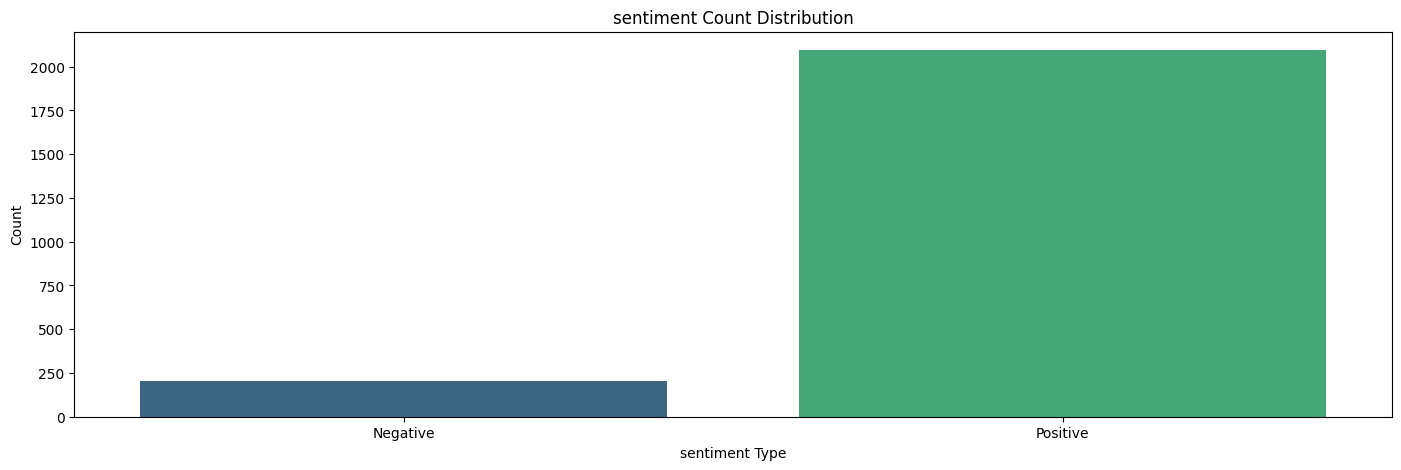

In [19]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,5))
ax = sns.countplot(data=amazon_Reviews, x='sentiment', palette='viridis')

# Rename x-tick labels (assuming 0 = Negative, 1 = Positive)
ax.set_xticklabels(["Negative", "Positive"])

plt.title("sentiment Count Distribution")
plt.xlabel("sentiment Type")
plt.ylabel("Count")
plt.show()


In [20]:
amazon_Reviews.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


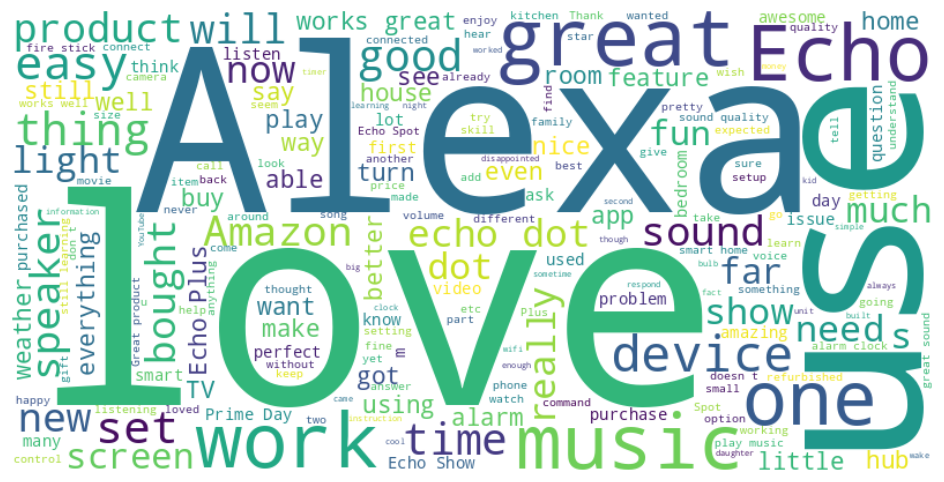

In [21]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Assuming you have a column 'Tweet content' in your dataframe
text_data = amazon_Reviews['reviews'].dropna().str.cat(sep=' ')  # Combine all the tweets into one string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

# Text Preprocessing

In [22]:
amazon_Reviews['reviews']

,reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
2795,"Listening to music, searching locations, check..."
2796,"I do love these things, i have them running my..."
2797,Only complaint I have is that the sound qualit...
2799,Nice little unit no issues


Convert to Lowercase

In [23]:
amazon_Reviews['reviews'] = amazon_Reviews['reviews'].str.lower()


In [24]:
amazon_Reviews['reviews']

,reviews
0,love my echo!
1,loved it!
2,"sometimes while playing a game, you can answer..."
3,i have had a lot of fun with this thing. my 4 ...
4,music
...,...
2795,"listening to music, searching locations, check..."
2796,"i do love these things, i have them running my..."
2797,only complaint i have is that the sound qualit...
2799,nice little unit no issues


In [25]:
# Ensure that necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
amazon_Reviews.head()

,reviews,sentiment
0,love my echo!,1
1,loved it!,1
2,"sometimes while playing a game, you can answer...",1
3,i have had a lot of fun with this thing. my 4 ...,1
4,music,1


Remove the puncturation

In [27]:
amazon_Reviews['reviews'][9]

'love it! i’ve listened to songs i haven’t heard since childhood! i get the news, weather, information! it’s great!'

In [28]:
import string
exclude  = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [29]:
# Remove punctuation from the 'Text' column
amazon_Reviews['reviews'] = amazon_Reviews['reviews'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [30]:
amazon_Reviews['reviews'][3]

'i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well'

In [31]:
amazon_Reviews.head()

,reviews,sentiment
0,love my echo,1
1,loved it,1
2,sometimes while playing a game you can answer ...,1
3,i have had a lot of fun with this thing my 4 y...,1
4,music,1


Remove Stopwords

In [32]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{"doesn't", 'and', 'once', "won't", 'again', 'during', 'when', 'the', 'down', 'how', 'over', 'this', 'not', "mustn't", 'a', 'had', 'has', 'was', 'from', 'themselves', 'he', 'needn', 'an', 'by', 'wasn', 'because', 't', 'it', 'few', 'before', 'him', "needn't", 'until', 'wouldn', 'where', 'up', 'your', 'there', 'been', 'mightn', 'above', 'off', 'does', 'you', 'ourselves', 'his', 'couldn', 'any', "she's", 'theirs', 'just', 'than', 'under', 'no', 'd', 'hasn', "haven't", 'nor', 'ain', "that'll", 'were', "should've", 'hers', 'only', "wasn't", 'don', 'as', 'me', 'those', 'am', 'so', 'of', 'aren', 'about', 'won', 'more', 'at', "you'll", 'which', 's', 'these', 'to', 'doesn', 'her', 'now', 'is', 've', 'them', "shan't", "don't", "wouldn't", 'who', "shouldn't", 'i', 'why', 'if', 'through', 'in', 'other', 'same', 'haven', 'she', 'hadn', 'having', 'y', 'shouldn', "didn't", "it's", 'or', 'each', "isn't", 'whom', 'own', 'should', 'herself', 'its', 'doing', 'have', 'out', 'isn', 'ma', 'can', 'being', "h

In [33]:
amazon_Reviews['reviews'] = amazon_Reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [34]:
amazon_Reviews['reviews'][2000]

'received wrong productwas excited install excitement gone thank amazon'

Tokenization

In [35]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to tokenize text
def spacy_tokenizer(text):
    doc = nlp(text)  # Process text with spaCy
    tokens = [token.text for token in doc]  # Extract tokens
    return " ".join(tokens)

# Apply tokenizer to DataFrame
amazon_Reviews['reviews'] = amazon_Reviews['reviews'].apply(spacy_tokenizer)

In [36]:
amazon_Reviews.head()

,reviews,sentiment
0,love echo,1
1,loved,1
2,sometimes playing game answer question correct...,1
3,lot fun thing 4 yr old learns dinosaurs contro...,1
4,music,1


In [37]:
amazon_Reviews['reviews'][11]

'love learning knew things eveyday still figuring everything works far easy use understand make laugh times'

o apply the PorterStemmer

In [38]:
import pandas as pd
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Function to apply stemming
def apply_stemming(text):
    words = text.split()  # Split text into individual words
    stemmed_words = [stemmer.stem(word) for word in words]  # Apply stemming to each word
    return " ".join(stemmed_words)  # Rejoin words back into a string

# Apply stemming function to the 'reviews' column
amazon_Reviews['reviews'] = amazon_Reviews['reviews'].apply(apply_stemming)


In [39]:
amazon_Reviews.head()

,reviews,sentiment
0,love echo,1
1,love,1
2,sometim play game answer question correctli al...,1
3,lot fun thing 4 yr old learn dinosaur control ...,1
4,music,1


In [40]:

from textblob import Word

# Function to correct spelling using TextBlob
def correct_spelling(text):    # Tokenize and correct each word using TextBlob's Word().correct()
    corrected_text = " ".join([str(Word(word).correct()) for word in text.split()])
    return corrected_text

# Apply spelling correction function to the 'reviews' column
amazon_Reviews['reviews'] = amazon_Reviews['reviews'].apply(correct_spelling)

In [81]:
amazon_Reviews['reviews'][56]

'work advertise east set still learn'

In [82]:
amazon_Reviews.head()

,reviews,sentiment
0,love echo,1
1,love,1
2,sometime play game answer question correctly a...,1
3,lot fun thing 4 or old learn dinosaur control ...,1
4,music,1


Handling Numbers in Text

In [85]:
amazon_Reviews['reviews'][3]

'lot fun thing 4 or old learn dinosaur control light play game like category nice sound play music well'

In [88]:
import pandas as pd
import inflect
import re

# Initialize inflect engine
p = inflect.engine()

# Function to replace numbers with words
def convert_numbers_to_words(text):
    if isinstance(text, str):
        return re.sub(r'\b\d+\b', lambda match: p.number_to_words(int(match.group())), text)
    return text

# Apply function to the 'review' column
amazon_Reviews['reviews'] = amazon_Reviews['reviews'].apply(convert_numbers_to_words)

In [90]:
amazon_Reviews.head()

,reviews,sentiment
0,love echo,1
1,love,1
2,sometime play game answer question correctly a...,1
3,lot fun thing four or old learn dinosaur contr...,1
4,music,1


In [91]:
amazon_Reviews['reviews'][3]

'lot fun thing four or old learn dinosaur control light play game like category nice sound play music well'

# Building the Model

In [92]:
# Drop column 'B'
X = amazon_Reviews.drop('sentiment', axis=1)
y = amazon_Reviews['sentiment']

In [93]:
X.head()

,reviews
0,love echo
1,love
2,sometime play game answer question correctly a...
3,lot fun thing four or old learn dinosaur contr...
4,music


In [94]:
print(f"shape : {X.shape} , shape : {y.shape} ")

shape : (2301, 1) , shape : (2301,) 


In [95]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
print("X_train shape:",X_train.shape,"X_test shape :",X_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)

X_train shape: (1840, 1) X_test shape : (461, 1) y_train shape : (1840,) y_test shape :  (461,)


In [97]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # Text preprocessing using TfidfVectorizer
        ('text', TfidfVectorizer(max_features=500),'reviews'),
    ]
)

In [98]:
preprocessor

ColumnTransformer(transformers=[('text', TfidfVectorizer(max_features=500),
                                 'reviews')])

In [99]:
preprocessor.fit

<bound method ColumnTransformer.fit of ColumnTransformer(transformers=[('text', TfidfVectorizer(max_features=500),
                                 'reviews')])>

In [100]:
# Define the classifiers and hyperparameters for tuning
classifiers_model = {
    "Random Forest": (RandomForestClassifier(), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }),

    "SVC": (SVC(), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    }),

    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 10],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    })
}

In [101]:
# Training and Evaluating All Models
best_model = None
best_score = 0
best_model_name = ""
predictions = {}  # Dictionary to store predictions for each model

for name, (clf, param_grid) in classifiers_model.items():
    try:
        # Create a pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])

        # Randomized Search for Hyperparameter Tuning
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_grid,
            n_iter=10,
            scoring='f1_weighted',
            cv=3,
            random_state=42,
            verbose=1,
            n_jobs=-1
        )

        # Fit the model
        random_search.fit(X_train, y_train)

        # Evaluate the model
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)
        predictions[name] = y_pred  # Store predictions


        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')



        # Update best model
        if f1 > best_score:
            best_model = best_estimator
            best_score = f1
            best_model_name = name
        best_params = random_search.best_params_
        # Print results for current model
        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {random_search.best_params_}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 80)

    except Exception as e:
        print(f"Error with {name}: {e}")

# Display the best model overall
print(f"\nBest Model: {best_model_name}")
print(f"Best F1 Score: {best_score:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Classifier: Random Forest
Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Accuracy: 0.91
Precision: 0.83
Recall: 0.91
F1 Score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.91      1.00      0.95       420

    accuracy                           0.91       461
   macro avg       0.46      0.50      0.48       461
weighted avg       0.83      0.91      0.87       461

Confusion Matrix:
[[  0  41]
 [  1 419]]
--------------------------------------------------------------------------------
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Classifier: SVC
Best Parameters: {'classifier__kernel': 'linear', 'classifier__gamma': 'auto', 'classifier__C': 10}
Accuracy: 0.91
Precision: 0.89
Recall: 0.91
F1 Scor

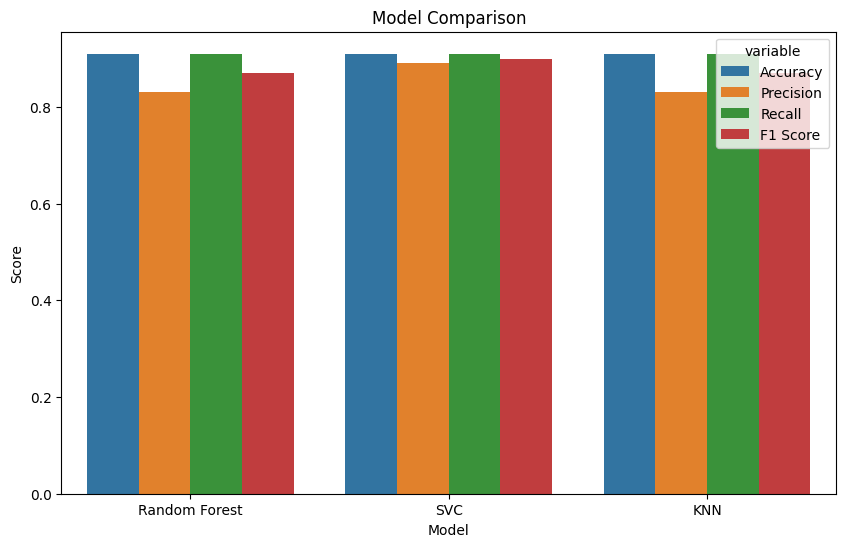

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
models = ['Random Forest', 'SVC', 'KNN']
accuracy = [0.91, 0.91, 0.91]
precision = [0.83, 0.89, 0.83]
recall = [0.91, 0.91, 0.91]
f1_score = [0.87, 0.90, 0.87]

# Create a DataFrame for visualization
df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='variable', data=pd.melt(df, id_vars=['Model']))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()


In [103]:
import pickle


# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save the trained model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)